# Capstone Proyect Notebook
## Final Project IBM Data Science

In [1]:
import pandas as pd
import numpy as np

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## 1. Introduction/Business Problem

### 1.1 Background

More than 3,000 people die every day in the world, as a result of traffic accidents.These are the leading cause of death in young people. The World Health Organization (WHO) qualifies the situation of traffic accidents as a priority public health problem throughout the world.Citizens in general are not aware of the magnitude of the problem of traffic accidents in the world, nor is it possible to quantify the number of people who, as a result of a traffic accident, are disabled for life and yet appear in the figures only as injured.In addition to the loss of human life, traffic accidents produce a huge economic impact, which, directly or indirectly, all citizens bear. It is estimated that on average the costs of traffic accidents reach 3% of the GDP of a country according to WHO figures, if this money were invested in education, housing, health, social assistance, imagine the benefit it would represent for our society.hese are the leading cause of death in young people.

### 1. 2 Problem

In this proyect will build a model to predict the severity of an acciden.The problem that this model seeks to solve is the ignorance that drivers have about the probabilities of an accident on a certain route and its severity, due to different variables such as the weather and road conditions, among others, that makes it impossible for drivers to make decisions in advance, such as driving more carefully or changing routes.

### 1.3 Interest

Not only drivers are interested in knowing the probabilities of a traffic accident to choose a better route, be careful when driving or postpone their trip. But it is also considered a global health problem, so it is in the interest of those responsible for transport in each country, to better understand the contributing factors and the relationships between them in order to introduce specific awareness campaigns and programs to reduce costs. road safety incidents, seeking as a major goal to reduce in this way the people affected by their health and the GDP expenditure of each country in traffic accidents.

## 2. Data understanding

### 2.1 Data Source

It was decided  to use the data set called Data-Collisions.csv, which shows data provided for this project from the Seattle Department of Transportation for the period between 1st January 2004 and 20th May 2020. This data set conteint a total of 194,673 collision incidents with 37 attributes.



### 2.2 Data Cleaning

In [5]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
#remove columns
df_data_2=df_data_1.drop(["INTKEY","EXCEPTRSNCODE","EXCEPTRSNDESC","INATTENTIONIND","PEDROWNOTGRNT","SDOTCOLNUM","SPEEDING","SEVERITYCODE.1","X","Y","LOCATION","INCDATE","INCDTTM","HITPARKEDCAR","STATUS","SEGLANEKEY","CROSSWALKKEY"],axis=1)
df_data_2.head(5)

,SEVERITYCODE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC
0,2,1,1307,1307,3502005,Intersection,Injury Collision,Angles,2,0,...,2,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,10,Entering at angle
1,1,2,52200,52200,2607959,Block,Property Damage Only Collision,Sideswipe,2,0,...,2,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...
2,1,3,26700,26700,1482393,Block,Property Damage Only Collision,Parked Car,4,0,...,3,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,32,One parked--one moving
3,1,4,1144,1144,3503937,Block,Property Damage Only Collision,Other,3,0,...,3,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,23,From same direction - all others
4,2,5,17700,17700,1807429,Intersection,Injury Collision,Angles,2,0,...,2,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,10,Entering at angle


In [7]:
#drop row with NaN values 
df_data_2.dropna(subset=['ROADCOND', "UNDERINFL", "ADDRTYPE", "COLLISIONTYPE", "JUNCTIONTYPE", "WEATHER", "LIGHTCOND"],axis=0, inplace=True)
df_data_2.head()
#transformed UNDERINFL
df_data_2=df_data_2.replace({"Y": 0, "N": 1})
df_data_2['SEVERITYDESC']=df_data_2['SEVERITYDESC'].astype('category')
df_data_2['UNDERINFL']=df_data_2['UNDERINFL'].astype(int)
df_data_2.dtypes

SEVERITYCODE        int64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
ADDRTYPE           object
SEVERITYDESC     category
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
UNDERINFL           int64
WEATHER            object
ROADCOND           object
LIGHTCOND          object
ST_COLCODE         object
ST_COLDESC         object
dtype: object

In [8]:
#Check that there are no missing values
missing_data = df_data_2.isnull()
missing_data.head(5)

,SEVERITYCODE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 2.3 Feature Selection

In [9]:
#Feature selection
df_data_3=df_data_2[["SEVERITYCODE","INCKEY","REPORTNO","ADDRTYPE","COLLISIONTYPE","SEVERITYDESC","PERSONCOUNT","PEDCOUNT","VEHCOUNT","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","ST_COLCODE"]]
df_data_3.corr()

,SEVERITYCODE,INCKEY,PERSONCOUNT,PEDCOUNT,VEHCOUNT,UNDERINFL
SEVERITYCODE,1.000000,0.034259,0.124545,0.245656,-0.081166,0.035763
INCKEY,0.034259,1.000000,-0.049568,0.032564,-0.014410,0.702275
PERSONCOUNT,0.124545,-0.049568,1.000000,-0.027211,0.399674,-0.028545
PEDCOUNT,0.245656,0.032564,-0.027211,1.000000,-0.317361,0.029523
VEHCOUNT,-0.081166,-0.014410,0.399674,-0.317361,1.000000,-0.014674
UNDERINFL,0.035763,0.702275,-0.028545,0.029523,-0.014674,1.000000


## 3. Exploratory Data Analysis

### 3.1 Target variable

In [10]:
%%capture
! pip install seaborn

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy import stats

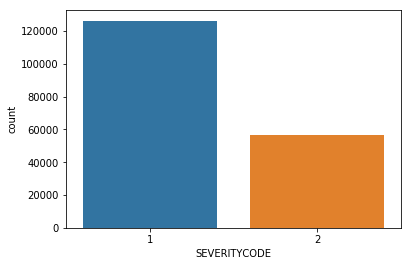

In [12]:
sns.countplot(df_data_3["SEVERITYCODE"],data=df_data_3)

### 3.2 Relationship between ADDRTYPE and SEVERITY of Accidents

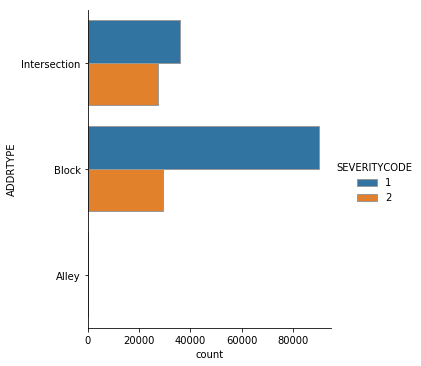

In [13]:
sns.catplot(y='ADDRTYPE', hue="SEVERITYCODE",kind="count",edgecolor=".6",data=df_data_3)

### 3.3 Relationship between COLLISIONTYPE and SEVERITY of Accidents

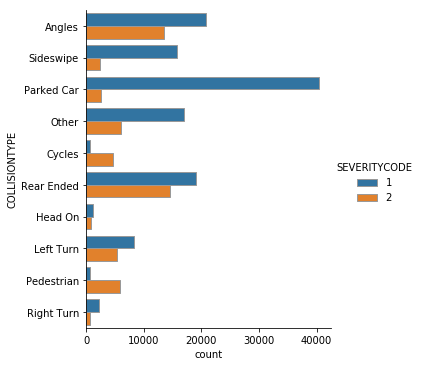

In [14]:
sns.catplot(y='COLLISIONTYPE', hue="SEVERITYCODE",kind="count",edgecolor=".6",data=df_data_3)

### 3.4 Relationship between VEHCOUNT and SEVERITY of Accidents

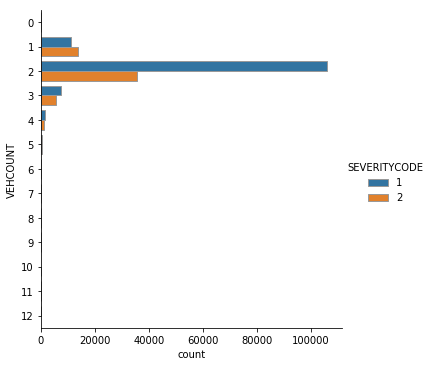

In [15]:
sns.catplot(y='VEHCOUNT', hue="SEVERITYCODE",kind="count",edgecolor=".6",data=df_data_3)

### 3.5 Relationship between PERSONCOUNT,VEHCOUNT and SEVERITY of Accidents

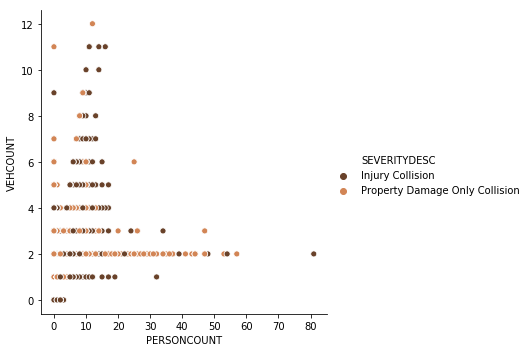

In [191]:
sns.relplot(x='PERSONCOUNT',y='VEHCOUNT', hue="SEVERITYDESC",data=df_data_3,palette='copper')

### 3.6 Relationship between PEDCOUNT,VEHCOUNT and SEVERITY of Accidents

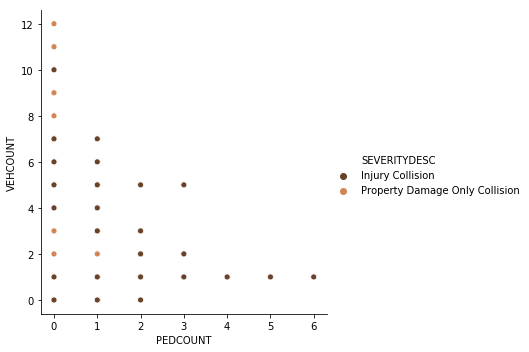

In [16]:
sns.relplot(x='PEDCOUNT',y='VEHCOUNT', hue="SEVERITYDESC",data=df_data_3,palette='copper')

### 3.7 Relationship between JUNCTIONTYPE and SEVERITY of Accidents

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


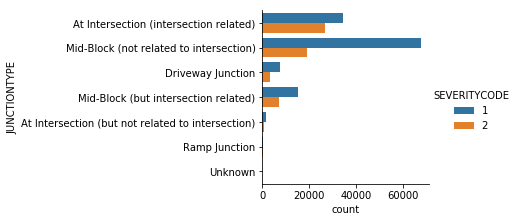

In [17]:
sns.catplot(y='JUNCTIONTYPE', hue="SEVERITYCODE",kind="count",data=df_data_3,height=3)

### 3.8 Relationship between UNDERINFL and SEVERITY of Accidents

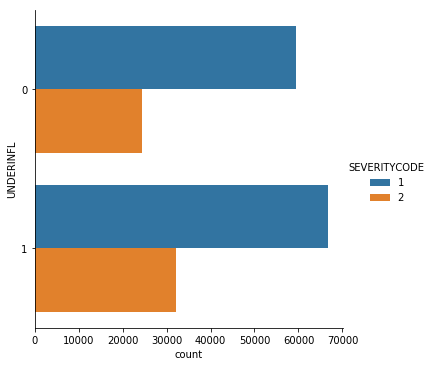

In [20]:
sns.catplot(y='UNDERINFL', hue="SEVERITYCODE",kind="count",data=df_data_3)

### 3.9 Relationship between WEATHER and SEVERITY of Accidents

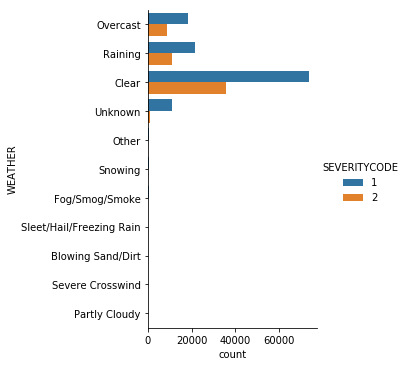

In [21]:
sns.catplot(y='WEATHER', hue="SEVERITYCODE",kind="count",data=df_data_3)

### 3.10 Relationship between ROADCOND and SEVERITY of Accidents

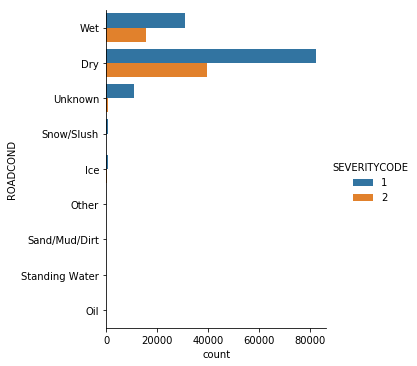

In [22]:
sns.catplot(y='ROADCOND', hue="SEVERITYCODE",kind="count",data=df_data_3)

### 3.11 Relationship between LIGHTCOND and SEVERITY of Accidents

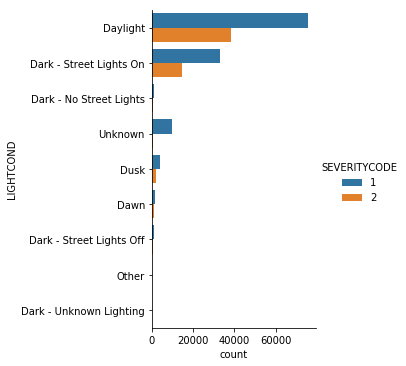

In [23]:
sns.catplot(y='LIGHTCOND', hue="SEVERITYCODE",kind="count",data=df_data_3)

## 4. Machine Learning Models

### 4.1 Balance Dataset

In [12]:
from sklearn.utils import resample
df_data_3['SEVERITYCODE'].value_counts()

1    126270
2     56625
Name: SEVERITYCODE, dtype: int64

In [13]:
df_severity_majority=df_data_3[df_data_3['SEVERITYCODE'] == 1]
df_severity_minority=df_data_3[df_data_3['SEVERITYCODE'] == 2]
df_minority_dowsampled=resample(df_severity_majority, replace=False,n_samples=56625,random_state=123)
df_result=pd.concat([df_minority_dowsampled,df_severity_minority])
df_result['SEVERITYCODE'].value_counts()

2    56625
1    56625
Name: SEVERITYCODE, dtype: int64

In [14]:
#Convert categorical variables to numeric values

from sklearn import preprocessing 

addrtype=preprocessing.LabelEncoder()
addrtype.fit(df_result['ADDRTYPE'])
df_result['ADDRTYPE']=addrtype.transform(df_result['ADDRTYPE'])

junctiontype=preprocessing.LabelEncoder()
junctiontype.fit(df_result['JUNCTIONTYPE'])
df_result['JUNCTIONTYPE']=junctiontype.transform(df_result['JUNCTIONTYPE'])

wheather=preprocessing.LabelEncoder()
wheather.fit(df_result['WEATHER'])
df_result['WEATHER']=wheather.transform(df_result['WEATHER'])

roadcond=preprocessing.LabelEncoder()
roadcond.fit(df_result['ROADCOND'])
df_result['ROADCOND']=roadcond.transform(df_result['ROADCOND'])

roadcond=preprocessing.LabelEncoder()
roadcond.fit(df_result['LIGHTCOND'])
df_result['LIGHTCOND']=roadcond.transform(df_result['LIGHTCOND'])


df_result.head()

,SEVERITYCODE,INCKEY,REPORTNO,ADDRTYPE,COLLISIONTYPE,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
129091,1,168616,3581067,1,Sideswipe,Property Damage Only Collision,2,0,2,4,1,1,0,5,11
175353,1,277820,3753800,2,Left Turn,Property Damage Only Collision,5,0,2,1,1,1,0,5,28
110094,1,137477,3593633,1,Parked Car,Property Damage Only Collision,2,0,2,4,1,1,0,2,32
46167,1,67135,2795005,2,Left Turn,Property Damage Only Collision,5,0,2,1,0,1,0,5,28
38310,1,58699,2410680,1,Parked Car,Property Damage Only Collision,2,0,2,3,0,4,8,5,32


In [15]:
#Training and test set
from sklearn.model_selection import train_test_split
feature=df_result[['ADDRTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','VEHCOUNT']]
X=feature

y=df_result['SEVERITYCODE'].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (90600, 6) (90600,)
Test set: (22650, 6) (22650,)


### 4.2 K Nearest Neighbor(KNN)

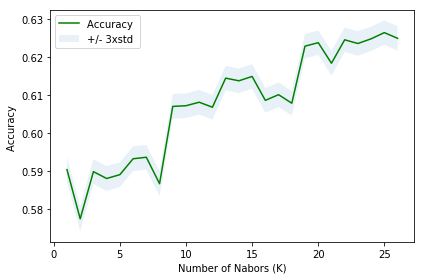

The best accuracy was with 0.6265342163355409 with k= 25


In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 27
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [24]:
#KNN MODEL
k = 25
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')

### 4.3 Decision Tree

In [16]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [17]:
from sklearn.tree import DecisionTreeClassifier

jaccard_array=[]
f1_score_array=[]

md_initial=3

for md in range (md_initial,10,1):
    dt=DecisionTreeClassifier(criterion='entropy', max_depth=md)
    dt.fit(X_train,y_train)
    dt_yhat=dt.predict(X_test)
    
    jaccard=jaccard_similarity_score(y_test,dt_yhat)
    f1=f1_score(y_test,dt_yhat,average='weighted')
    
    jaccard_array.append(jaccard)
    f1_score_array.append(f1)
    
print(f'Best value for max depth = {jaccard_array.index(max(jaccard_array))+md_initial}')
print(f"Evaluation Jaccard = {jaccard}")
print(f"Evaluation F1 score = {f1}")

Best value for max depth = 7
Evaluation Jaccard = 0.6381015452538631
Evaluation F1 score = 0.6377897634205948


In [18]:
#Decision Tree

Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
Tree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
Tree.fit(X_train,y_train)
predTree = Tree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

[2 2 1 1 2]
[2 1 1 1 1]
DecisionTrees's Accuracy:  0.6391169977924945


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9880bd3_2         151 KB  conda-forge
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge
    python_abi:      3.6-1_cp36m        conda-forge

The following packages will be UPDATED:

 

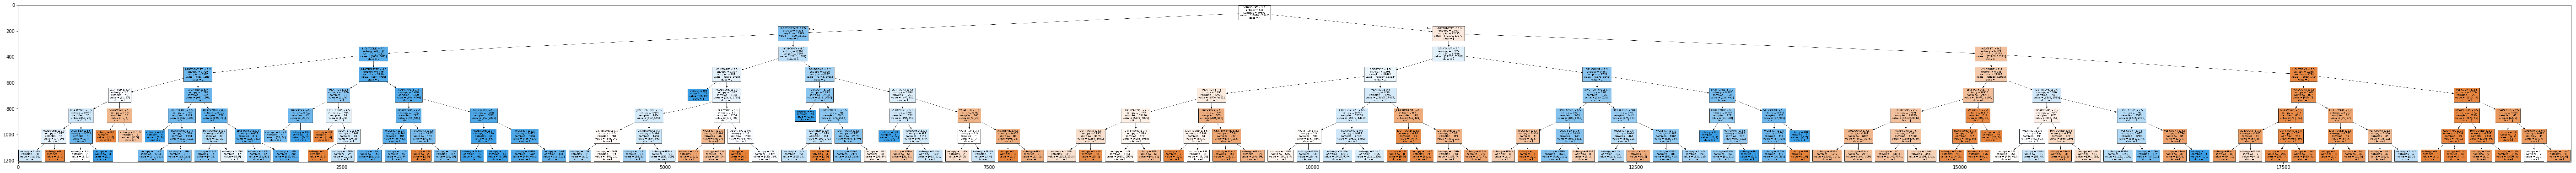

In [26]:
#!conda install -c conda-forge pydotplus -y
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
dot_data = StringIO()
filename = "tree.png"
featureNames = feature.columns[0:6]
targetNames = df_result['SEVERITYCODE'].unique().tolist()
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names=str(targetNames), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

###  4.4 Support Vector Machine

In [63]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [64]:
yhat3 = clf.predict(X_test)
print (yhat3[0:5])
print (y_test[0:5])

[2 2 1 1 2]
[2 1 1 1 1]


In [65]:
print("SVM Accuracy: ", metrics.accuracy_score(y_test, yhat3))

SVM Accuracy:  0.6343929359823399


### 4.5 Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat4 = LR.predict(X_test)
yhat4_prob = LR.predict_proba(X_test)
yhat4_prob

array([[0.34581249, 0.65418751],
       [0.62098466, 0.37901534],
       [0.53055297, 0.46944703],
       ...,
       [0.65584878, 0.34415122],
       [0.65584878, 0.34415122],
       [0.63830642, 0.36169358]])

In [67]:
print("Logistic Regression Accuracy: ", metrics.accuracy_score(y_test, yhat4))

Logistic Regression Accuracy:  0.5993377483443708


## 5. Models Evaluation

In [25]:
#KNN

#Train Model and Predict  
knn_yhat = kNN_model.predict(X_test)
print("KNN:")
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, knn_yhat))
print("Avg F1-score: %.4f" % f1_score(y_test, knn_yhat))


print("-----------------------------")

#Decision Trees
predTree1 = Tree.predict(X_test)
print("Decision Trees:")
print("Jaccard score : %.4f" % jaccard_similarity_score(y_test, predTree1))
print("Avg F1-score : %.4f" % f1_score(y_test, predTree1))

KNN:
Jaccard score: 0.6265
Avg F1-score: 0.6219
-----------------------------
Decision Trees:
Jaccard score : 0.6391
Avg F1-score : 0.6323


In [69]:
yhat5 = clf.predict(X_test)
print("SVM:")
print("Jaccard score : %.4f" % jaccard_similarity_score(y_test, yhat5))
print("Avg F1-score : %.4f" % f1_score(y_test, yhat5, average='weighted'))

print("-----------------------------")
#Logistic Regression
yhat6 = LR.predict(X_test)
yhat6_prob = LR.predict_proba(X_test)
print("Logistic Regression:")
print("Jaccard score : %.4f" % jaccard_similarity_score(y_test, yhat6))
print("Avg F1-score : %.4f" % f1_score(y_test, yhat6, average='weighted'))
print("Log Loss : %.4f" % log_loss(y_test,yhat6_prob))

SVM:
Jaccard score : 0.6344
Avg F1-score : 0.6341
-----------------------------
Logistic Regression:
Jaccard score : 0.5993
Avg F1-score : 0.5972
Log Loss : 0.6645


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.63    | 0.62     | NA      |
| Decision Tree      | 0.64    | 0.63     | NA      |
| SVM                | 0.63    | 0.63     | NA      |
| LogisticRegression | 0.60    | 0.59     | 0.67    |

## 6. Conclusions

## 7. Future Directions